In [2]:
import os
import numpy as np
import pandas as pd
import uproot as ur

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'gold', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']

In [3]:
n_pt_bins = 4
pthatmins = np.array([20, 100, 500, 1000])
jet_pt_lo = np.array([20, 100, 500, 1000])
jet_pt_hi = np.array([30, 120, 550, 1100])

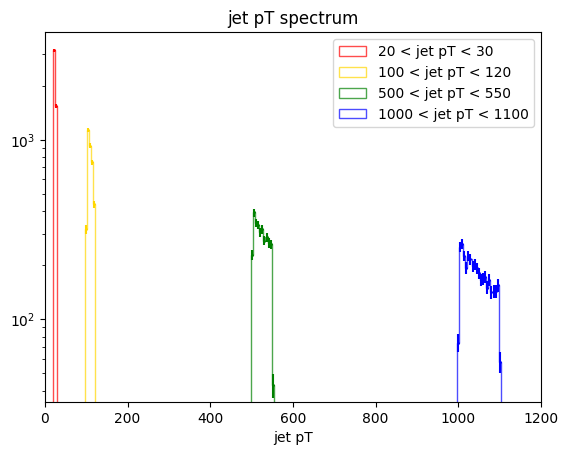

[4698.0, 3563.0, 3052.0, 3681.0]


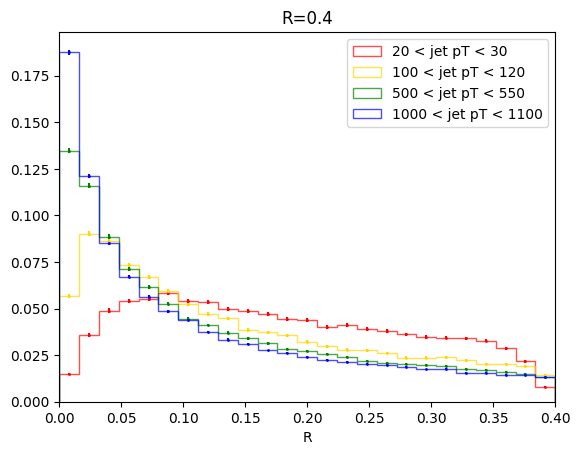

In [4]:
h_jetpt = []
h_jetshape = []
for pthatmin in pthatmins:
    f = ur.open("pt{}_R0p4.root".format(pthatmin))
    h_jetpt.append(f["h_jetpt"])
    h_jetshape.append(f["h_jetshape"])
    
integrals = []
for i in range(len(h_jetpt)):
    h = h_jetpt[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*i], label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    integrals.append(np.sum(h.counts()))
    
plt.legend(loc='upper right')
plt.title("jet pT spectrum") 
plt.xlabel('jet pT')
plt.xlim(0, 1200)
plt.yscale('log')
plt.show()
print(integrals)


for i in range(n_pt_bins):
    h = h_jetshape[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), edgecolor=L_colors[2*i], lw=1, histtype = 'step', alpha=0.7, fill=False, label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    
plt.legend(loc='upper right')
plt.title("R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()

h_R0p4 = h_jetshape


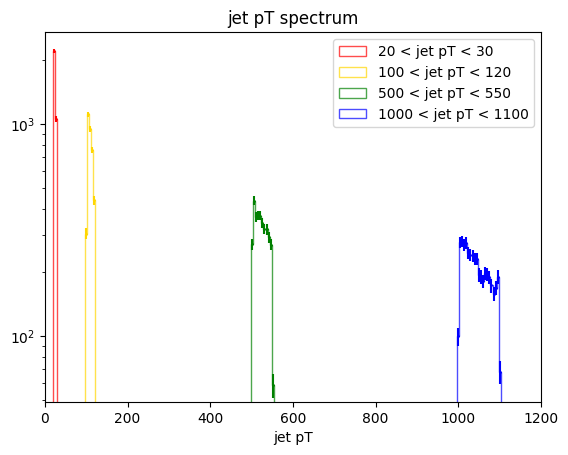

[3275.0, 3558.0, 3427.0, 4311.0]


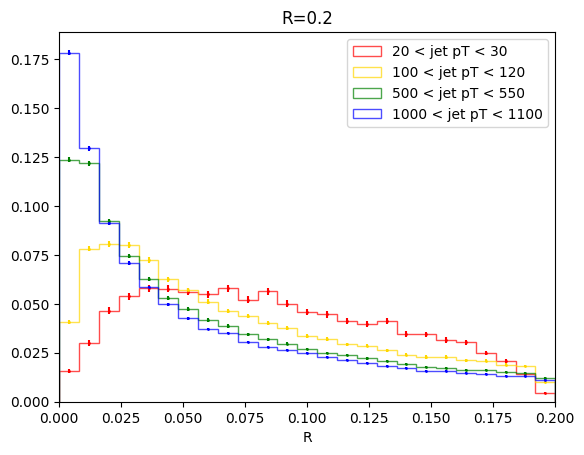

In [5]:
h_jetpt = []
h_jetshape = []
for pthatmin in pthatmins:
    f = ur.open("pt{}_R0p2.root".format(pthatmin))
    h_jetpt.append(f["h_jetpt"])
    h_jetshape.append(f["h_jetshape"])
    
integrals = []
for i in range(len(h_jetpt)):
    h = h_jetpt[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*i], label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    integrals.append(np.sum(h.counts()))
    
plt.legend(loc='upper right')
plt.title("jet pT spectrum") 
plt.xlabel('jet pT')
plt.xlim(0, 1200)
plt.yscale('log')
plt.show()
print(integrals)


for i in range(n_pt_bins):
    h = h_jetshape[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), edgecolor=L_colors[2*i], lw=1, histtype = 'step', alpha=0.7, fill=False, label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    
plt.legend(loc='upper right')
plt.title("R=0.2") 
plt.xlabel('R')
plt.xlim(0, 0.2)
plt.show()

h_R0p2 = h_jetshape


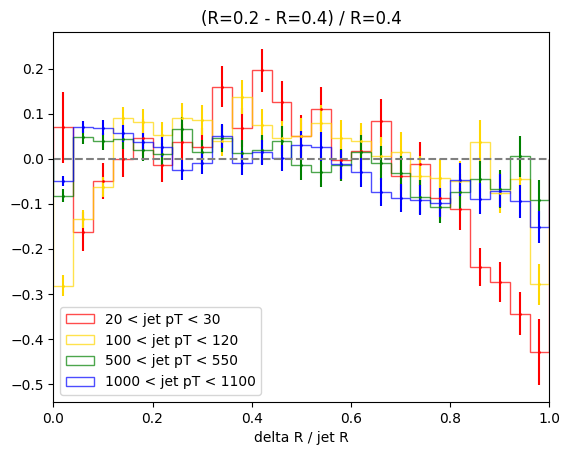

In [6]:
# (R=0.2 - R=0.4) / R=0.2
# R scalled so that x-axis = delta R/jet R (percentage of jet R)

def get_rel_err(a, b):
    return np.sqrt( a.errors()**2 + (a.counts()**2 / b.counts()**2) * b.errors()**2) / b.counts()

for i in range(n_pt_bins):
    bin_edges = np.linspace(0,1,len(h_R0p2[i].axis("x").edges()))
    bin_width = bin_edges[1] - bin_edges[0]
    values = (h_R0p2[i].counts() - h_R0p4[i].counts()) / h_R0p4[i].counts()
    errors = get_rel_err(h_R0p2[i], h_R0p4[i])
    plt.hist(bin_edges[:-1], bin_edges, weights=values, edgecolor=L_colors[2*i], lw=1, histtype = 'step', alpha=0.7, fill=False, label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, values, yerr=errors, fmt='o', markersize=1, color=L_colors[2*i])
    
plt.axhline(0, linestyle='--', color='gray')
plt.legend(loc='lower left')
plt.title("(R=0.2 - R=0.4) / R=0.4") 
plt.xlabel('delta R / jet R')
plt.xlim(0, 1)
plt.show()

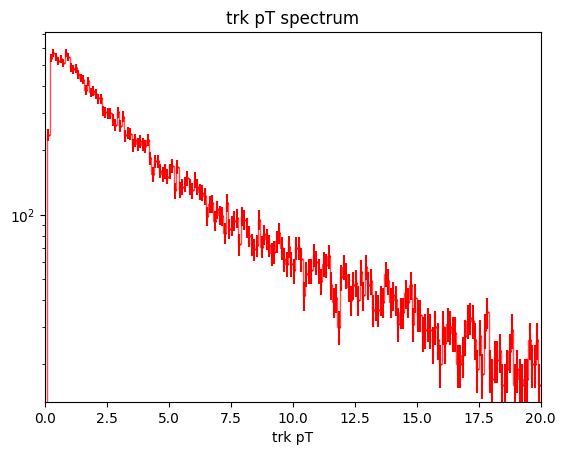

In [29]:
f = ur.open("pt100_R0p4.root")
h_jetpt = f["h_jetpt"]
h_jetshape = f["h_jetshape"]
h_trkpt = f["h_trkpt"]

h = h_trkpt
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]
plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[0])

plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.yscale('log')
plt.show()


In [37]:
# trk pt bins
trk_pt_lo = [0, 1, 2, 4, 7]
trk_pt_hi = [1, 2, 4, 7, 20]

def findbin(h_axis, value):
    edges = h_axis.edges()
    for i in range(len(edges)-1):
        if edges[i] <= value and value < edges[i+1]:
            return i
    return len(edges)-1

def yslice(th2d, bin_lo, bin_hi):
    h_slice = th2d.T[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionXY(h):
    return np.sum(h, axis=2)

def xslice(th2d, bin_lo, bin_hi):
    h_slice = th2d[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionX(h):
    if len(h.shape) == 3:
        return np.sum(projectionXY(h), axis=1)
    return np.sum(h, axis=1)

def projectionXZ(h):
    return np.sum(h, axis=1)


Njets : 1786.0
(0, 4)
(4, 8)
(8, 16)
(16, 28)
(28, 80)


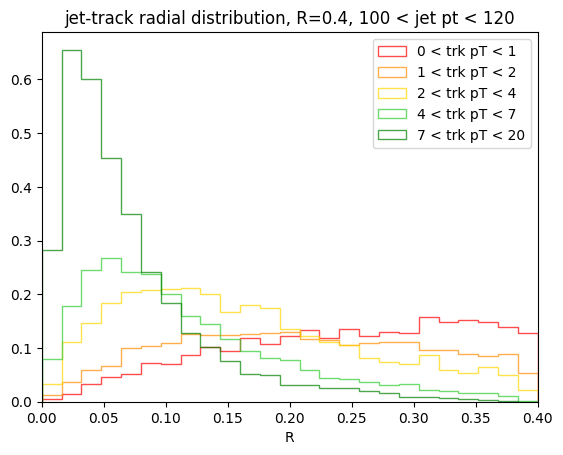

In [28]:
f = ur.open("pt100_R0p4.root")
h = f["h_jetshape"]
h_numpy = h.to_numpy()[0]
h_numpy = projectionXY(h_numpy)
N_jets = np.sum(f["h_jetpt"].to_numpy()[0])
print("Njets : " + str(N_jets))

integrals = []
h_trkpt_100 = []
for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
    this_slice = this_slice / N_jets

    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
    h_trkpt_100.append(this_slice)
    
plt.legend(loc='upper right')
plt.title("jet-track radial distribution, R=0.4, 100 < jet pt < 120") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()


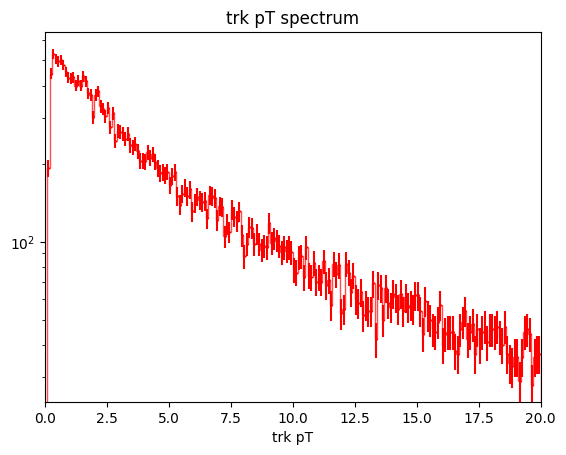

Njets : 1523.0
(0, 4)
2247.0
(4, 8)
3960.0
(8, 16)
5508.0
(16, 28)
4967.0
(28, 80)
8703.0


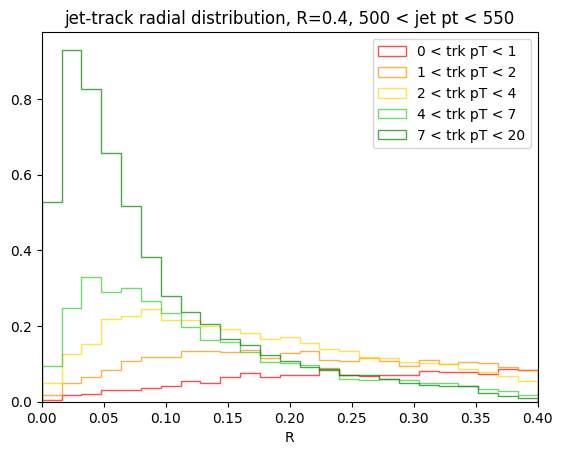

In [32]:
f = ur.open("pt500_R0p4.root")
h_trkpt = f["h_trkpt"]

h = h_trkpt
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]
plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[0])

plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.yscale('log')
plt.show()

h = f["h_jetshape"]
h_numpy = h.to_numpy()[0]
h_numpy = projectionXY(h_numpy)
N_jets = np.sum(f["h_jetpt"].to_numpy()[0])
print("Njets : " + str(N_jets))

integrals = []
h_trkpt_500 = []
for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
    print(np.sum(this_slice))
    this_slice = this_slice / N_jets

    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
    h_trkpt_500.append(this_slice)
    
plt.legend(loc='upper right')
plt.title("jet-track radial distribution, R=0.4, 500 < jet pt < 550") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()

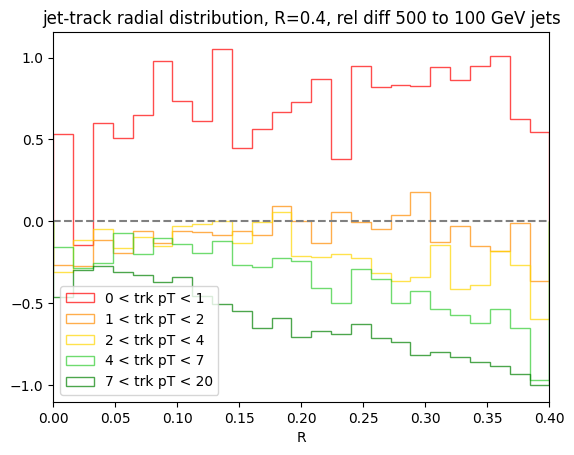

[]


In [33]:
for i in range(len(trk_pt_lo)):
    num = h_trkpt_100[i]
    denom = h_trkpt_500[i]
    this_slice = (num - denom) / denom

    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))

plt.axhline(0, linestyle='--', color='gray')
plt.legend(loc='lower left')
plt.title("jet-track radial distribution, R=0.4, rel diff 500 to 100 GeV jets") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()
print(integrals)

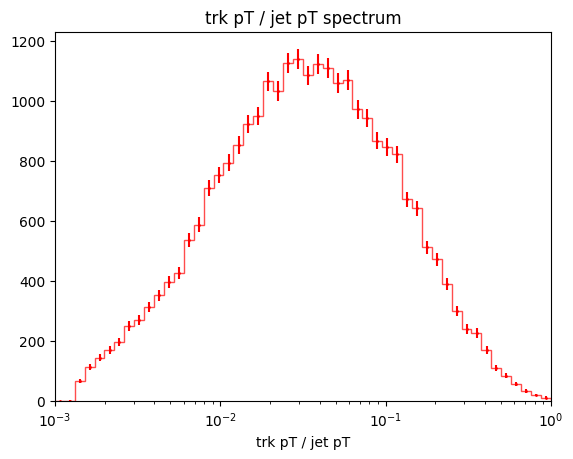

In [34]:
f = ur.open("pt100_R0p4.root")
h_trkpt = f["h_ptprofile"]

h = h_trkpt
bin_edges = h.axis("x").edges()
bin_widths = [bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges)-1)]
plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
plt.errorbar(bin_edges[:-1]+np.array(bin_widths)/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[0])

plt.title("trk pT / jet pT spectrum") 
plt.xlabel('trk pT / jet pT')
plt.xscale("log")
plt.xlim(0.001, 1)
plt.show()

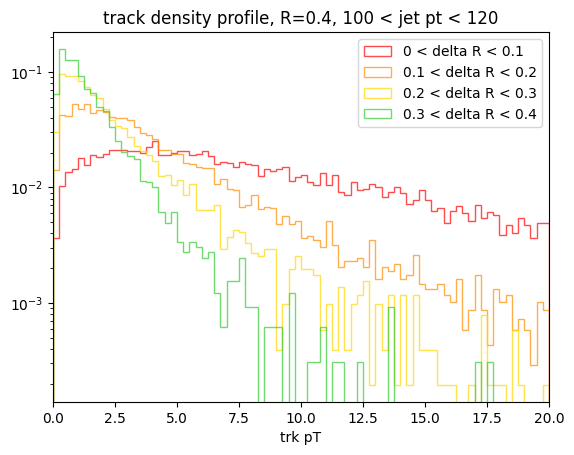

[9503.0, 6871.0, 5124.0, 3259.0]


In [35]:
r_bin_low = [0, 0.1, 0.2, 0.3]
r_bin_high = [0.1, 0.2, 0.3, 0.4]

f = ur.open("pt100_R0p4.root")
h = f["h_jetshape"].to_numpy()[0]
bin_edges = f["h_jetshape"].axis("y").edges()
bin_widths = [bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges)-1)]

integrals = []
for i in range(len(r_bin_low)):
    binlo = round(25 * r_bin_low[i] / 0.4)
    binhi = round(25 * r_bin_high[i] / 0.4)
    this_slice = xslice(projectionXY(h), binlo, binhi)
    
    integrals.append(np.sum(this_slice))
    this_slice = this_slice / np.sum(this_slice)

    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < delta R < {}'.format(r_bin_low[i], r_bin_high[i]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.legend(loc='upper right')
plt.title("track density profile, R=0.4, 100 < jet pt < 120") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.yscale("log")
plt.show()
print(integrals)


Njets : 1786.0


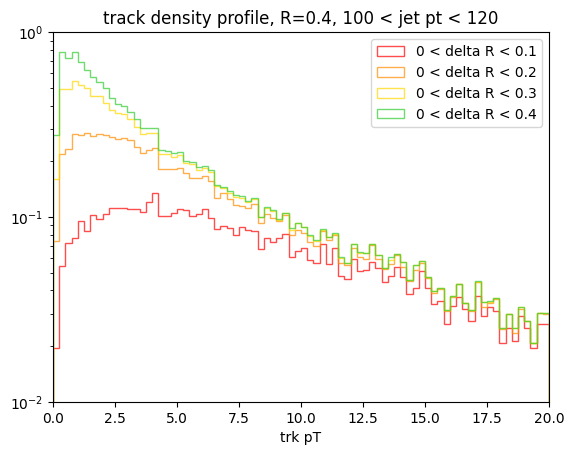

In [47]:
r_bin_low = [0, 0.1, 0.2, 0.3]
r_bin_high = [0.1, 0.2, 0.3, 0.4]

f = ur.open("pt100_R0p4.root")
h = f["h_jetshape"].to_numpy()[0]
N_jets = np.sum(f["h_jetpt"].to_numpy()[0])
print("Njets : " + str(N_jets))

bin_edges = f["h_jetshape"].axis("y").edges()
bin_widths = [bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges)-1)]

for i in range(len(r_bin_low)):
    binlo = 0
    binhi = round(25 * r_bin_high[i] / 0.4)
    this_slice = xslice(projectionXY(h), binlo, binhi)
    this_slice = this_slice / N_jets

    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < delta R < {}'.format(0, r_bin_high[i]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.legend(loc='upper right')
plt.title("track density profile, R=0.4, 100 < jet pt < 120") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.ylim(1e-2, 1)
plt.yscale("log")
plt.show()

[0.         0.02778399 0.09224061 0.16517591 0.23207364 0.29541219
 0.35254547 0.40345483 0.4495006  0.49336613 0.53145498 0.56840713
 0.60392442 0.6359757  0.66573494 0.69364937 0.72117248 0.7472421
 0.77083333 0.79457364 0.81840713 0.84058214 0.86080054 0.88120528]
[0.         0.02770458 0.0836599  0.14130836 0.19408223 0.24229556
 0.28551142 0.32315633 0.35809768 0.38963912 0.41875009 0.44618157
 0.47036334 0.49402624 0.51632372 0.53735134 0.55563445 0.573426
 0.59065773 0.60655133 0.62258148 0.63705504 0.65110532 0.66387209]


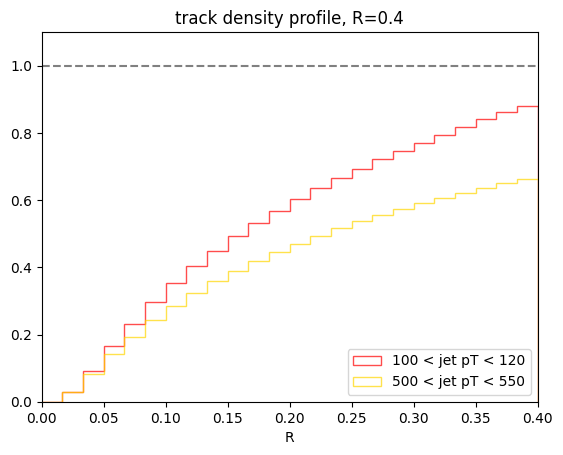

[]


In [127]:
fs = [ur.open("pt100_R0p4_temptemp2.root"), ur.open("pt500_R0p4_temptemp2.root")]
jet_pt_mask = [1, 2]
for i in range(len(fs)):
    f = fs[i]
    h = f["h_jetshape"].to_numpy()[0]
    
    n_r_bins = 25
    bin_edges = np.linspace(0, 0.4, 25)
    bin_widths = 0.4 / n_r_bins

    integrals = []

    h_to_graph = np.array([np.sum(xslice(projectionXZ(h), 0, i)) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*i], label='{} < jet pT < {}'.format(jet_pt_lo[jet_pt_mask[i]], jet_pt_hi[jet_pt_mask[i]]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()
print(integrals)

[     0.           7692.04110357  24995.13366915  41395.54820266
  54636.41771503  65297.49925504  73843.36953278  80833.89222897
  86380.3522632   91136.32051474  94920.52316592  98215.16208852
 101292.19366882 103757.18803423 105900.04477206 107773.72787772
 109577.93429404 111094.04333138 112452.83347005 113709.46190997
 114895.07269272 115875.66211919 116755.97688548 117614.93868686]
[     0.          11951.87930913  33441.37123378  52714.27852625
  68324.98779954  81440.59024969  91897.64548603 100058.95979881
 107084.83408093 113364.08773369 118721.32168152 123574.18836624
 127598.34213599 131433.22166885 134835.91865813 137882.61064886
 140496.2372148  142956.81558645 145262.01787844 147320.02793849
 149204.38219256 151053.8531975  152714.65088938 154051.46355246]


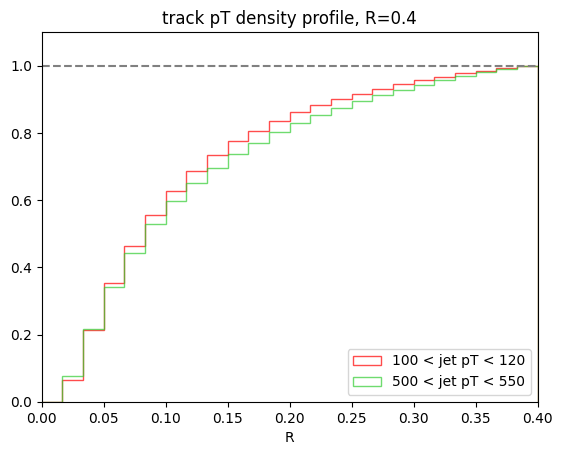

[]


In [41]:
fs = [ur.open("pt100_R0p4.root"), ur.open("pt500_R0p4.root")]
jet_pt_mask = [1, 2]
for i in range(len(fs)):
    f = fs[i]
    h = f["h_ptshape"].to_numpy()[0]

    n_r_bins = 25
    bin_edges = np.linspace(0, 0.4, 25)
    bin_widths = 0.4 / n_r_bins

    integrals = []

    h_to_graph = np.array([np.sum(xslice(projectionX(h), 0, i)) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label='{} < jet pT < {}'.format(jet_pt_lo[jet_pt_mask[i]], jet_pt_hi[jet_pt_mask[i]]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()
print(integrals)

Njets : 1786.0
(0, 4)
(4, 8)
(8, 16)
(16, 28)
(28, 80)


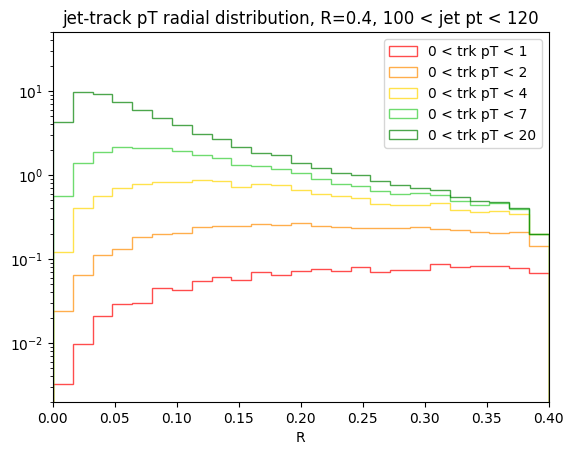

In [52]:
f = ur.open("pt100_R0p4.root")
h = f["h_ptshape"]
N_jets = np.sum(f["h_jetpt"].to_numpy()[0])
print("Njets : " + str(N_jets))

h_numpy = h.to_numpy()[0]
h_numpy = projectionXY(h_numpy)

bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

integrals = []
for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, 0, trk_pt_range[1])
    this_slice = this_slice / N_jets
    
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(0, trk_pt_hi[i]))
    
plt.legend(loc='upper right')
plt.title("jet-track pT radial distribution, R=0.4, 100 < jet pt < 120") 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
plt.ylim(2e-3, 5e1)
plt.show()